<a href="https://colab.research.google.com/github/Umashankar9818/itsuma/blob/main/Hotel_booking_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


path= '/content/drive/MyDrive/Hotel Bookings (1).csv'
df= pd.read_csv('/content/drive/MyDrive/Hotel Bookings (1).csv')
df.head()
df.info()
df.describe()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df1= df.copy()
df1


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [ ]:
#df1['is_canceled'].unique()
#df1['arrival_date_year'].unique()
#df1['meal'].unique()
#df1['market_segment'].unique()
#df1['distribution_channel'].unique()
#df1['children'].unique()


array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df1[['children']]= df1[['children']].fillna(0)
df1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df1.isnull().sum().sort_values(ascending = False)[:6]

company                   112593
agent                      16340
country                      488
hotel                          0
previous_cancellations         0
reservation_status             0
dtype: int64

In [ ]:
#Now we are adding Total people here
df1['total_people']= df1['adults']+df1['children']+df1['babies']
df1

#Now we will do some Analysis
new_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','required_car_parking_spaces','adr','total_of_special_requests','total_people']]
correlational_format = new_df1.corr()
print(correlational_format)


                                lead_time  previous_cancellations  \
lead_time                        1.000000                0.086042   
previous_cancellations           0.086042                1.000000   
previous_bookings_not_canceled  -0.073548                0.152728   
booking_changes                  0.000149               -0.026993   
days_in_waiting_list             0.170084                0.005929   
required_car_parking_spaces     -0.116451               -0.018492   
adr                             -0.063077               -0.065646   
total_of_special_requests       -0.095712               -0.048384   
total_people                     0.072265               -0.020058   

                                previous_bookings_not_canceled  \
lead_time                                            -0.073548   
previous_cancellations                                0.152728   
previous_bookings_not_canceled                        1.000000   
booking_changes                              

PREFERRED HOTEL TYPE:

We have to know about the preferred hotel type,use to stay by the people.



([<matplotlib.patches.Wedge at 0x7f005e951710>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(0.9564161333812984, 0.5433858480011848, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.45%'),
  Text(0.52168152729889, 0.29639228072791896, '33.55%')])

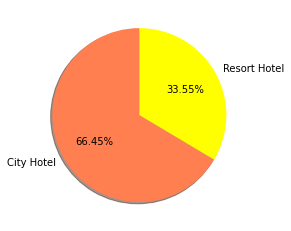

In [ ]:
#Now we will look which hotel is best for stay.
hotel_type = df1['hotel'].value_counts()
hotel_type
#myexplode = [0.2, 0,]
mycolors = ["Coral", "yellow", "b", "#4CAF50"]
plt.pie(hotel_type, labels=hotel_type.index, startangle=90, autopct='%0.2f%%', shadow=True, colors=mycolors )


INFERENCE- The city hotel is likely to more preferd resort hotel .The Percentage of city hotel 66.45% while the percentage of redort hotel 33.55%

DATA EXTRACTION

Question-Have you ever wondered when the best time of year to book a hotel room is? 

In [ ]:
# So for this, we will extract the data (The number of customer booked in a month)
df= df1['arrival_date_month'].value_counts()
df


August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'Best time to stay')

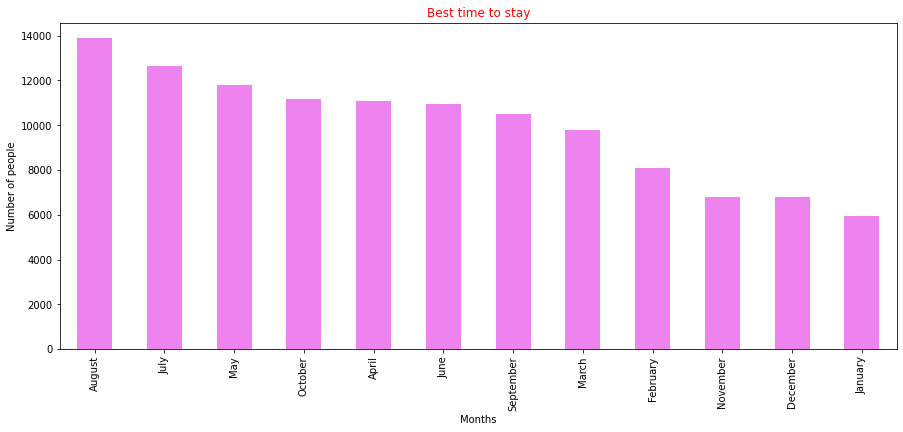

In [ ]:
best_month= df1['arrival_date_month'].value_counts()
best_month
plt.figure(figsize=(15,6))
best_month.plot.bar(color="Violet" )
plt.xlabel("Months")
plt.ylabel("Number of people")
plt.title("Best time to stay", color="Red")




Inference- The number of people are highest in the month of August. The number of people are 13,877. So we can observe that the best time of booking for hotel room is August.

Now its time to grab the information about optimal length of stay

In [ ]:
weekend = df1['stays_in_weekend_nights'].value_counts()
weekend

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

Text(0.5, 1.0, 'optimal length to stay')

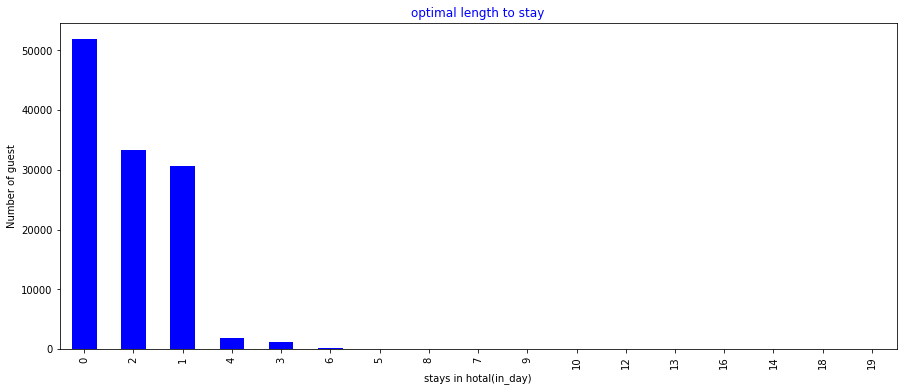

In [ ]:
weekend = df1['stays_in_weekend_nights'].value_counts()
weekend
plt.figure(figsize=(15,6))
weekend.plot.bar(color="blue" )
plt.xlabel("stays in hotal(in_day)")
plt.ylabel("Number of guest")
plt.title("optimal length to stay", color="Blue")


In [ ]:
df1['stays_in_week_nights'].value_counts()


2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

Text(0, 0.5, 'No. of people')

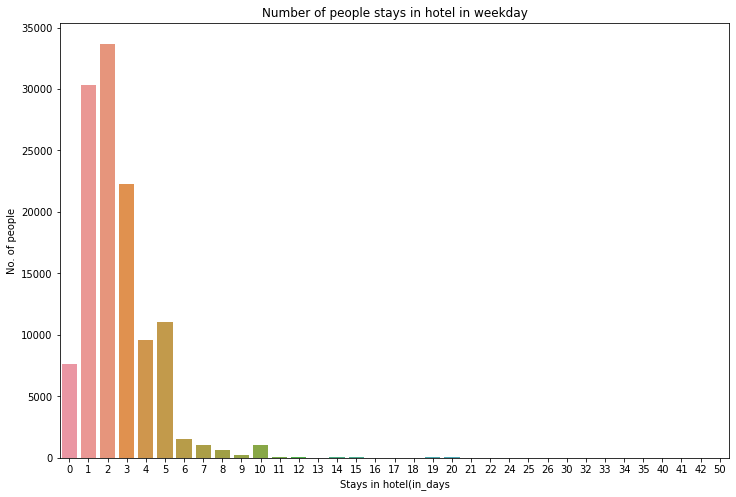

In [ ]:
sns.countplot(x = df1.stays_in_week_nights);
plt.gcf().set_size_inches(12,8)
plt.xticks(rotation=0)
plt.title("Number of people stays in hotel in weekday")
plt.xlabel("Stays in hotel(in_days")
plt.ylabel("No. of people")


INFERENCE :

From above ploted graph we can say that more than 50,000 people use to stay less than 1 day in hotel and then 33,308 people use to stay 2 day and after that 30,626 people use to stay 1 day at night, when there is weekend.

YEARWISE BOOKING HOTEL

Text(0.5, 1.0, 'yearwise booking')

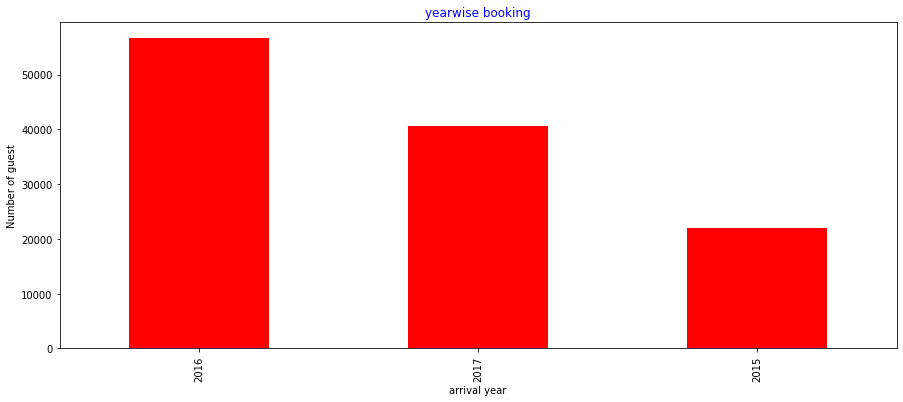

In [ ]:
Yearwise_booking=df1['arrival_date_year'].value_counts()
Yearwise_booking
plt.figure(figsize=(15,6))
Yearwise_booking.plot.bar(color="red" )
plt.xlabel("arrival year")
plt.ylabel("Number of guest")
plt.title("yearwise booking", color="Blue")

Question- Hotels booked by the country.

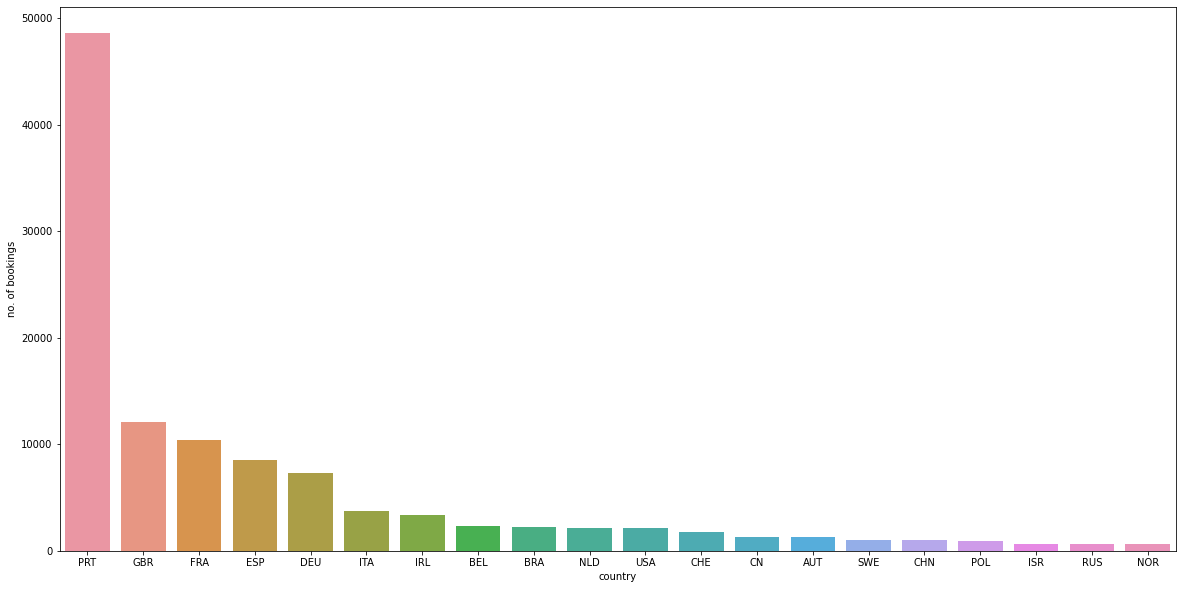

In [ ]:
grp_by_country = df1.groupby('country')
df_2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
df_2 = df_2[:20]
plt.figure(figsize = (20,10))
sns.barplot(x = df_2.index, y = df_2['no. of bookings'])
plt.show()

INFERENCE :

Here we can conclude from the graph that people of portugal(PRT) is doing maximu numbers of bookings or we can say portugal is best tourist attraction so that huge amount of tourist came and visit portugal and do hotel bookings to stay on weekend or weekdays.

What is preferred stay in each hotel?

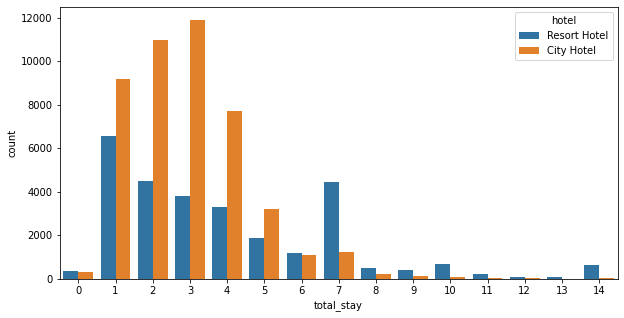

In [ ]:
df1['total_stay']=df1['stays_in_weekend_nights']+df1['stays_in_week_nights']
not_canceled = df1[df1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

                                lead_time  previous_cancellations  \
lead_time                        1.000000                0.086042   
previous_cancellations           0.086042                1.000000   
previous_bookings_not_canceled  -0.073548                0.152728   
booking_changes                  0.000149               -0.026993   
days_in_waiting_list             0.170084                0.005929   
required_car_parking_spaces     -0.116451               -0.018492   
adr                             -0.063077               -0.065646   
total_of_special_requests       -0.095712               -0.048384   
total_people                     0.072265               -0.020058   

                                previous_bookings_not_canceled  \
lead_time                                            -0.073548   
previous_cancellations                                0.152728   
previous_bookings_not_canceled                        1.000000   
booking_changes                              

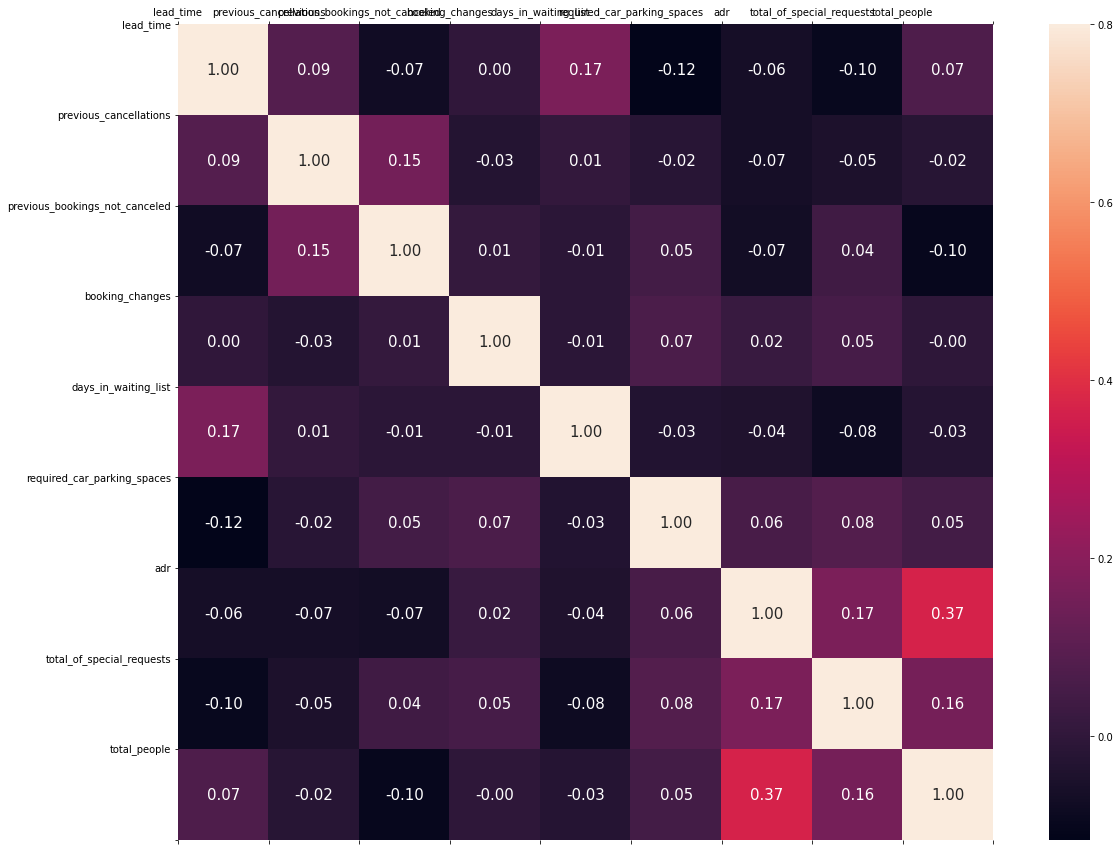

In [ ]:
correlational_format =new_df1.corr()
f, ax = plt.subplots(figsize=(20, 15))
print(correlational_format)
sns.heatmap(correlational_format,fmt='.2f', annot_kws={'size': 15},  vmax=.8, square=True,  annot=True)
ax.matshow(correlational_format, cmap=plt.get_cmap('Greens'))
plt.show()

**Hotel wise anaylsis**

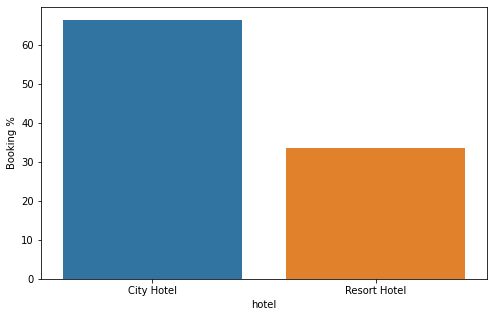

In [ ]:
grouped_by_hotel= df1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()
